## 🖼️ Display Sample Images

Before we start building and training our convolutional neural network model, it is crucial to familiarize ourselves with the dataset. The function below, `display_sample_images`, is designed to visually inspect the data we're about to process. It randomly selects a few images from each specified category within a given directory and displays them. This visual assessment allows us to ensure that the image loading process is working correctly and gives us a qualitative glimpse into the variations present within our data.

By default, the function will display three images from each category, but this can be adjusted by changing the `num_samples` parameter.

<div style="background-color:#f8f8f8; border-left:5px solid #2c3e50; padding:10px 15px; margin-bottom:20px; line-height:1.6;">
<strong>Function:</strong> <code>display_sample_images(directory, categories, num_samples=3)</code>
<ul>
<li><strong>directory</strong>: The path to the directory where the image categories are located.</li>
<li><strong>categories</strong>: A list containing the names of the categories to display.</li>
<li><strong>num_samples</strong>: The number of images to display from each category.</li>
</ul>
</div>

To ensure a smooth and efficient visualization, we use libraries such as `matplotlib` for plotting and `OpenCV` for image handling. The function is tailored to handle grayscale images, which are typical in medical imaging datasets like brain scans.

Here's how the function can be utilized to display sample images from the 'Training' directory of brain scans:

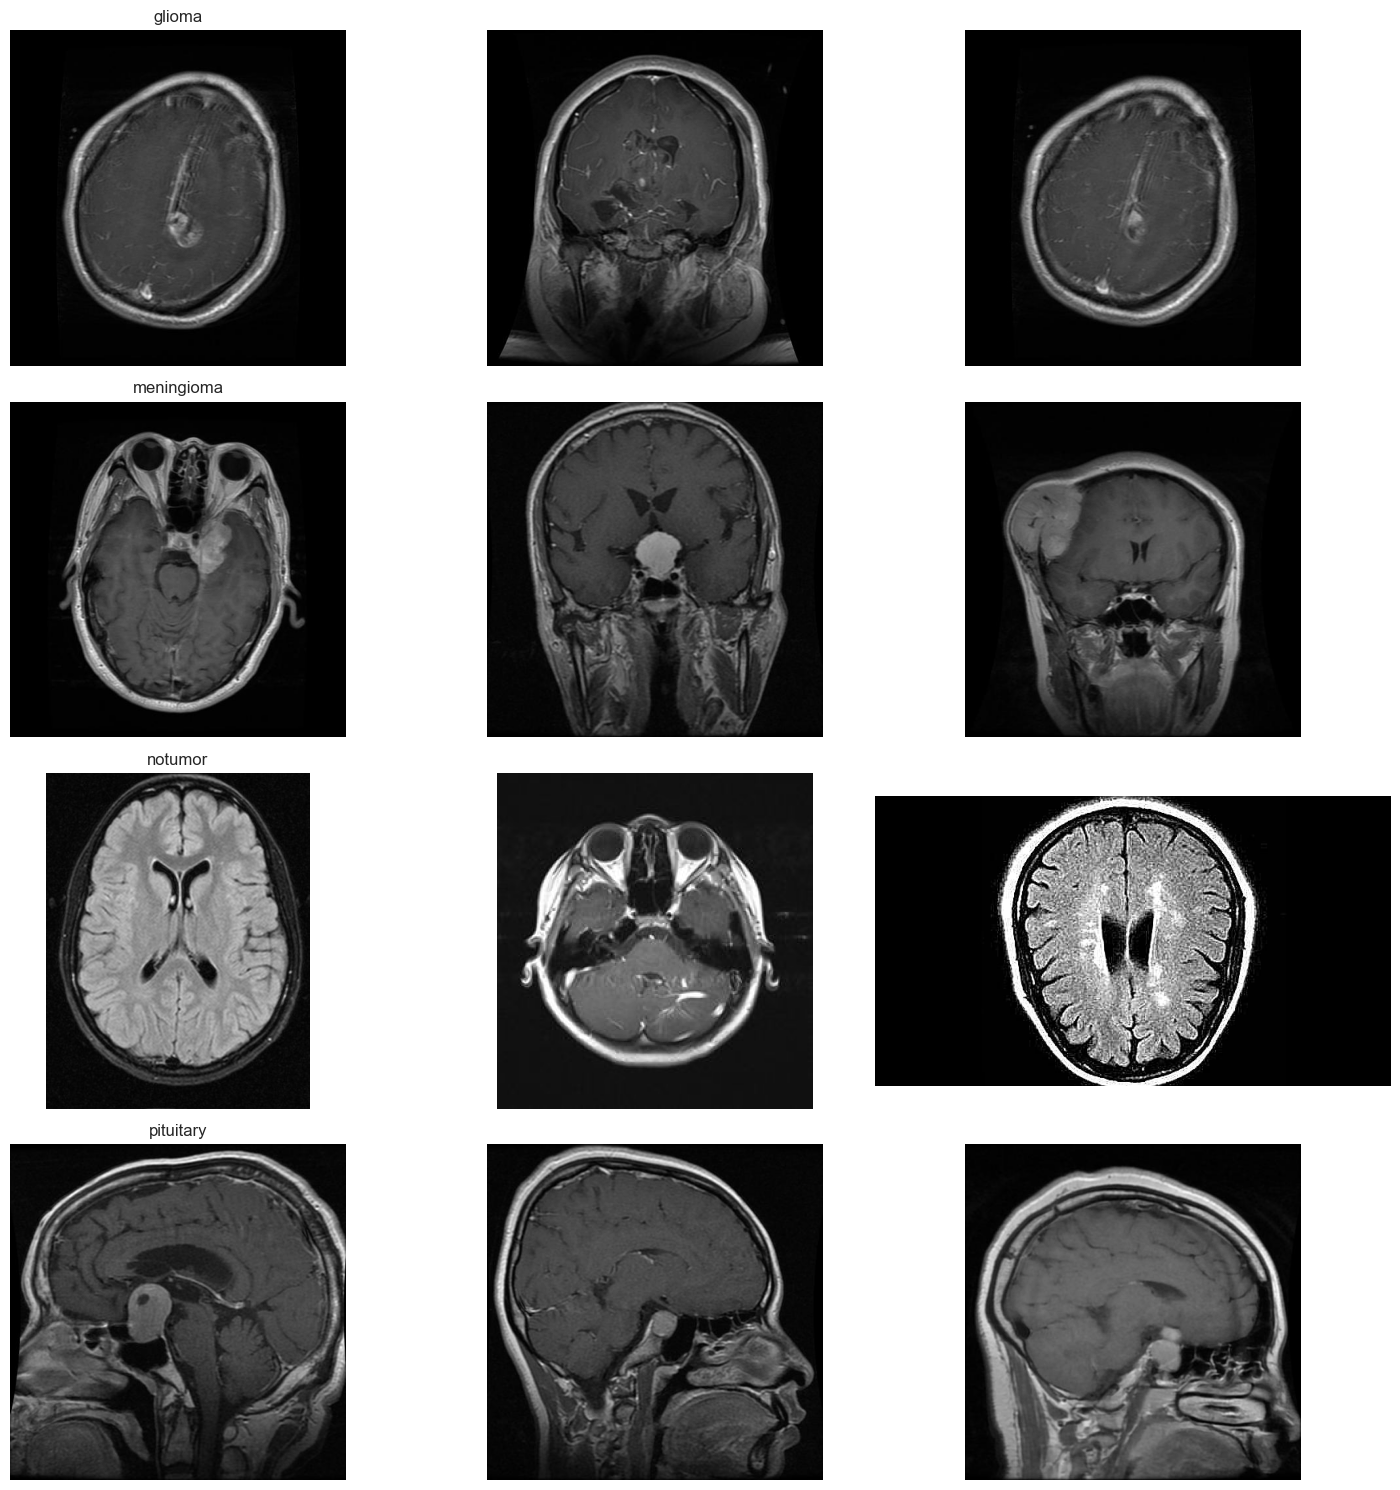

In [1]:
import matplotlib.pyplot as plt
import cv2
import random
import os

# Function to display sample images from each category
def display_sample_images(directory, categories, num_samples=3):
    """
    Displays sample images from each specified category.

    Parameters:
    directory (str): The directory path where categories are located.
    categories (list): A list of category names.
    num_samples (int): Number of samples to display from each category.
    """
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 15))
    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        image_files = os.listdir(category_path)
        random_samples = random.sample(image_files, num_samples)
        for j, sample in enumerate(random_samples):
            image_path = os.path.join(category_path, sample)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            axes[i, j].imshow(image, cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(category)
    plt.tight_layout()
    plt.show()

training_dir = 'Training'
training_contents = ['glioma', 'meningioma', 'notumor', 'pituitary']
# Display sample images from the Training directory
display_sample_images(training_dir, training_contents)


## 🛠️ Preprocess Images for Model Input

Preparing the dataset correctly is a pivotal step in the pipeline of a machine learning project, especially when dealing with images. This preparation includes several preprocessing tasks such as converting images to grayscale, resizing them to a uniform dimension, normalizing the pixel values, and applying a Gaussian blur to reduce image noise and detail. The function described below, `preprocess_images`, encapsulates all these steps.

Each preprocessed image will be reshaped to a dimension of \( 128 \times 128 \) pixels by default, which can be adjusted through the `img_size` parameter. The preprocessing steps help in reducing computational load and improving the algorithm's performance by focusing on the essential features.

<div style="background-color:#f8f8f8; border-left:5px solid #2c3e50; padding:10px 15px; margin-bottom:20px; line-height:1.6;">
<strong>Function:</strong> <code>preprocess_images(directory, categories, img_size=(128, 128))</code>
<ul>
<li><strong>directory</strong>: The path to the directory where the images are stored.</li>
<li><strong>categories</strong>: A list of strings representing the different image categories.</li>
<li><strong>img_size</strong>: A tuple that defines the desired size of the output images (width, height).</li>
</ul>
The function returns a tuple containing an array of the preprocessed images and an array of their corresponding labels.
</div>

The following Python code implements the preprocessing function using `numpy` for numerical operations and `OpenCV` for image processing. After preprocessing, we'll also confirm the shapes of the arrays to verify that our images and labels are correctly structured for input into a neural network.

In [2]:
import numpy as np

# Function to preprocess images
def preprocess_images(directory, categories, img_size=(128, 128)):
    """
    Preprocesses images by converting to grayscale, resizing, normalizing, and blurring.

    Parameters:
    directory (str): The directory path where categories are located.
    categories (list): A list of category names.
    img_size (tuple): The desired size of the output images.

    Returns:
    np.array: An array of preprocessed images.
    np.array: An array of labels corresponding to the images.
    """
    preprocessed_images = []
    labels = []
    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        image_files = os.listdir(category_path)
        for image_file in image_files:
            image_path = os.path.join(category_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(image, img_size)
            normalized_image = resized_image / 255.0
            blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)
            preprocessed_images.append(blurred_image)
            labels.append(i)
    return np.array(preprocessed_images), np.array(labels)

# Preprocess the training images
img_size = (128, 128)
preprocessed_images, labels = preprocess_images(training_dir, training_contents, img_size)

# Confirm the shape of the preprocessed images and labels arrays
preprocessed_images.shape, labels.shape


((5712, 128, 128), (5712,))


After executing this code, we will have a collection of images ready to be fed into our deep learning model, along with their associated labels for supervised learning.

## 🔍 Visualizing Preprocessed Image Samples

After preprocessing images, it is just as important to visualize the outcomes to ensure that the preprocessing steps were performed correctly. The function `display_preprocessed_samples` provided below serves this purpose by displaying samples from each category post-preprocessing. This visualization step confirms that images are indeed ready for the next stages of our machine learning or deep learning workflow.

This function selects a few images at random from the preprocessed dataset and displays them in a grid. Each row in the grid corresponds to a different category, allowing for an immediate visual comparison between the classes.

<div style="background-color:#f8f8f8; border-left:5px solid #2c3e50; padding:10px 15px; margin-bottom:20px; line-height:1.6;">
<strong>Function:</strong> <code>display_preprocessed_samples(images, labels, categories, num_samples=3)</code>
<ul>
<li><strong>images</strong>: An array of preprocessed images.</li>
<li><strong>labels</strong>: An array of labels corresponding to the images.</li>
<li><strong>categories</strong>: A list containing the names of the categories to display.</li>
<li><strong>num_samples</strong>: The number of images to display from each category, with a default of three.</li>
</ul>
The function will produce a plot with a row for each category and the specified number of columns for samples.
</div>

Below is the Python code that defines and calls the `display_preprocessed_samples` function. The images shown are grayscale images that have been resized, normalized, and blurred as per our preprocessing pipeline.


# Call the function with the preprocessed images and labels
display_preprocessed_samples(preprocessed_images, labels, training_contents)


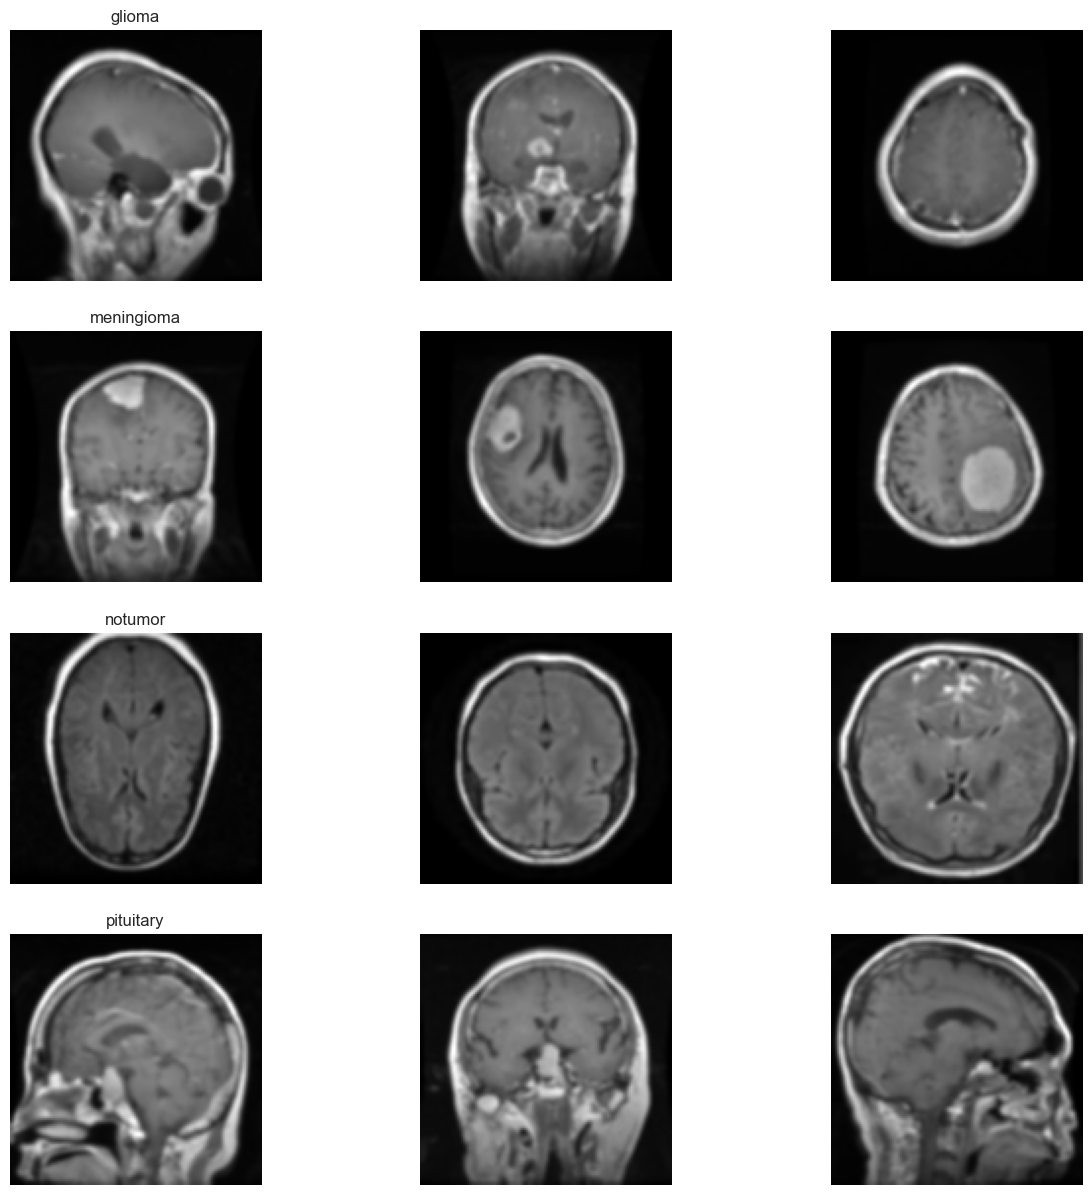

In [3]:
# Function to display sample preprocessed images from each category
def display_preprocessed_samples(images, labels, categories, num_samples=3):
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 15))
    for i, category in enumerate(categories):
        idxs = np.where(labels == i)[0]
        random_samples = np.random.choice(idxs, num_samples, replace=False)
        for j, sample in enumerate(random_samples):
            image = images[sample]
            axes[i, j].imshow(image, cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(category)
    plt.show()

# Display sample preprocessed images from the Training directory
display_preprocessed_samples(preprocessed_images, labels, training_contents)


## Data Preparation and Model Evaluation

### Flatten Images for Classifier Input
Flattened images are required to transform our data into a format that's compatible with machine learning models which expect a 1D array per image.

In [5]:
from sklearn.model_selection import train_test_split

# Flatten the preprocessed images for input into the classifier
flattened_images = preprocessed_images.reshape(preprocessed_images.shape[0], -1)


### Splitting Data into Training and Validation Sets
We split our dataset to provide a valid representation of model performance on unseen data.

In [6]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    flattened_images, labels, test_size=0.2, random_state=42
)

### Model Training and Visualization with k-Nearest Neighbors (k-NN)
A k-NN classifier is utilized here to establish a baseline for our classification task. The visualization showcases the performance of the classifier.

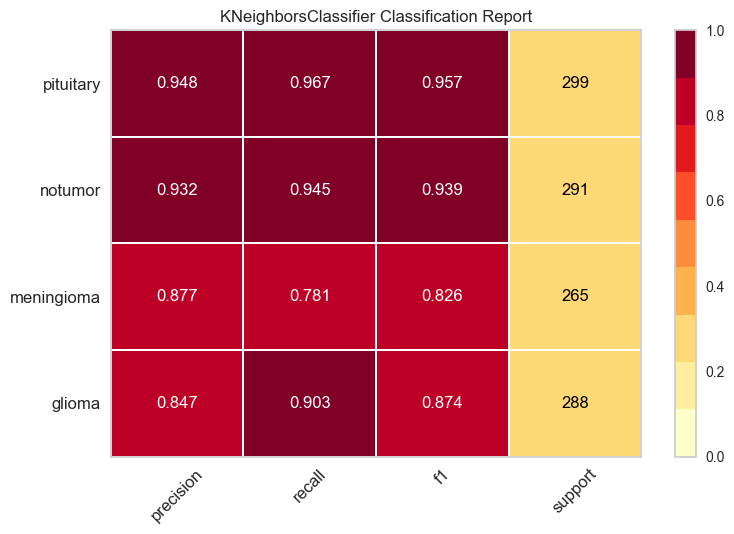

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ClassificationReport

# Initialize the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize the ClassificationReport visualizer
visualizer = ClassificationReport(knn, classes=training_contents, support=True)

# Fit the model and visualize the classification report
visualizer.fit(X_train, y_train)       # Fit the visualizer and the model
visualizer.score(X_val, y_val)         # Evaluate the model on the test data
visualizer.show()                      # Finalize and render the figure

## Preprocessing and Evaluation on Test Data

### Preprocess Test Images
The same preprocessing steps applied to the training images must be applied to the test images to ensure consistency when evaluating the model's performance.

In [8]:
# Preprocess the test images
test_dir = 'Testing'
preprocessed_test_images, test_labels = preprocess_images(test_dir, training_contents, img_size)


### Shape Confirmation
It is crucial to confirm that the shape of the preprocessed test images and labels arrays is as expected.


In [9]:
# Confirm the shape of the preprocessed test images and labels arrays
preprocessed_test_images.shape, test_labels.shape

((1311, 128, 128), (1311,))


### Flatten Test Images for Classifier Input
The test images are flattened to match the expected input structure of the classifier.

In [10]:
# Flatten the preprocessed test images
flattened_test_images = preprocessed_test_images.reshape(preprocessed_test_images.shape[0], -1)


### Model Evaluation with Classification Report
Finally, we evaluate the trained k-NN model on the preprocessed test dataset using the `ClassificationReport` from Yellowbrick to visualize the performance.

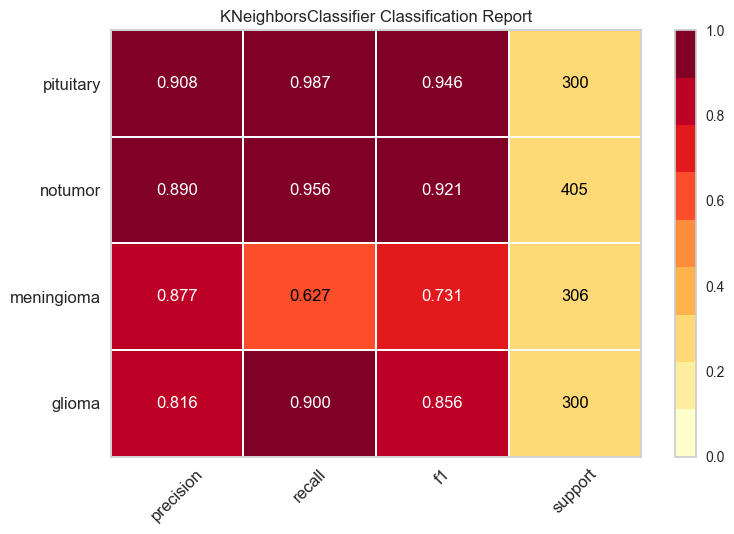

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [11]:
from yellowbrick.classifier import ClassificationReport

# Reuse the k-NN classifier and visualize the classification report
visualizer = ClassificationReport(knn, classes=training_contents, support=True)

# Fit the visualizer on the entire dataset and evaluate on the test data
visualizer.fit(flattened_images, labels)                  # Fit the visualizer and the model
visualizer.score(flattened_test_images, test_labels)      # Evaluate the model on the test data
visualizer.show()                                         # Finalize and render the figure

### Model Architecture

For our brain tumor classification task, we will design a Convolutional Neural Network (CNN) that is capable of extracting features from our preprocessed images and classifying them into the respective categories. A CNN is particularly well-suited for image recognition tasks due to its ability to capture spatial hierarchies in the data.

Below is the setup for our CNN architecture. It consists of convolutional layers, max pooling layers, and fully connected layers. Each convolutional layer will use ReLU activation functions to introduce non-linearity, and the model will output the probability distribution over the possible classes using a softmax activation function in the last layer.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model architecture
def build_model(input_shape):
    """
    Builds a CNN model according to the specified input shape.

    Parameters:
    input_shape (tuple): The shape of the input images.

    Returns:
    model (tf.keras.Model): The constructed CNN model.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')  # assuming 4 categories of brain scans
    ])
    
    return model

# Assuming the images are 128x128 pixels and 1 channel for grayscale
model = build_model((128, 128, 1))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

2023-11-05 10:13:46.023605: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-11-05 10:13:46.023623: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-11-05 10:13:46.023630: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-11-05 10:13:46.023654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-05 10:13:46.023667: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Model Training

With our model architecture defined, we now move to the training phase. We'll use the preprocessed images as our training data and split them into training and validation sets to monitor the model's performance on unseen data.

The training process involves adjusting the weights of the network to minimize the loss function, which measures the difference between the predicted and actual labels. Over time, the model should improve its accuracy on both the training and validation datasets.


In [13]:
from sklearn.model_selection import train_test_split

# Prepare the data for training
preprocessed_images_expanded = np.expand_dims(preprocessed_images, axis=-1)  # expand dimensions for Keras
X_train, X_val, y_train, y_val = train_test_split(preprocessed_images_expanded, labels, test_size=0.2, random_state=42)

# Confirm the shape of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Set the number of epochs as per your requirement
    batch_size=32
)


Epoch 1/10


2023-11-05 10:13:49.063852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - ETA: 0s - loss: 0.8671 - accuracy: 0.6559

2023-11-05 10:13:52.192211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - 4s 23ms/step - loss: 0.8671 - accuracy: 0.6559 - val_loss: 0.5286 - val_accuracy: 0.8014
Epoch 2/10
143/143 [==============================] - 3s 21ms/step - loss: 0.5726 - accuracy: 0.8054 - val_loss: 0.4714 - val_accuracy: 0.8346
Epoch 3/10
143/143 [==============================] - 3s 22ms/step - loss: 0.4984 - accuracy: 0.8341 - val_loss: 0.3942 - val_accuracy: 0.8696
Epoch 4/10
143/143 [==============================] - 3s 21ms/step - loss: 0.4398 - accuracy: 0.8536 - val_loss: 0.3253 - val_accuracy: 0.8880
Epoch 5/10
143/143 [==============================] - 3s 23ms/step - loss: 0.3873 - accuracy: 0.8790 - val_loss: 0.3878 - val_accuracy: 0.8968
Epoch 6/10
143/143 [==============================] - 3s 22ms/step - loss: 0.3980 - accuracy: 0.8820 - val_loss: 0.3555 - val_accuracy: 0.9020
Epoch 7/10
143/143 [==============================] - 3s 21ms/step - loss: 0.3227 - accuracy: 0.8982 - val_loss: 0.4743 - val_accuracy: 0.8801
Epoch 8/10

### Training Performance Evaluation

After training the model, it's crucial to evaluate its performance to understand how well it has learned to classify the brain scans. We'll plot the training and validation accuracy and loss over each epoch to visualize the learning process. This will help us detect if the model is overfitting, underfitting, or if it has learned appropriately.


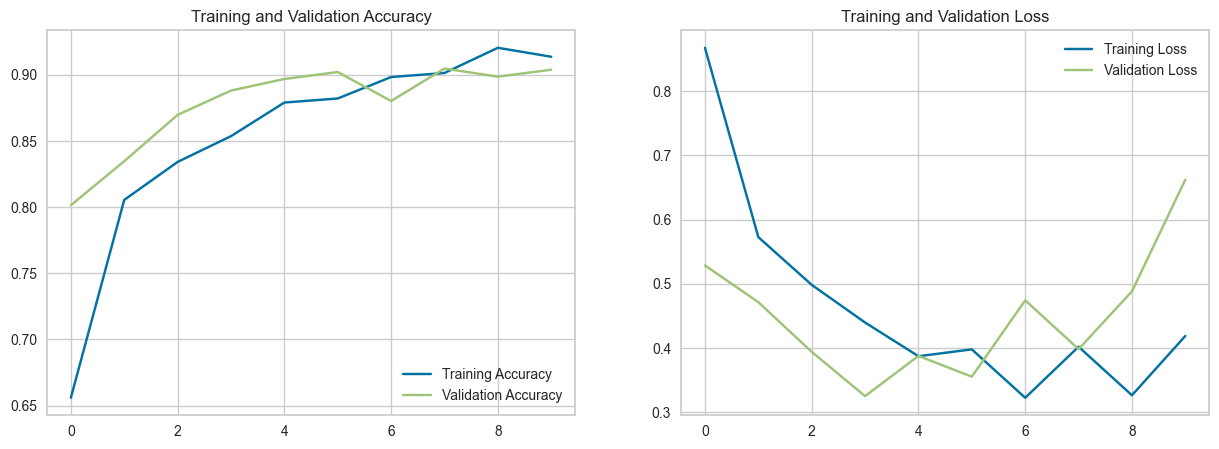

In [14]:
import matplotlib.pyplot as plt

# Plot the training history
def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    history (History): A TensorFlow History object containing the training history.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


### Test Data Preprocessing

To evaluate our model on new, unseen data, we must preprocess our test images in the same way as our training images. This will ensure consistency and allow the model to make predictions on data formatted similarly to what it was trained on. We'll use the `preprocess_images` function defined earlier to process the test images.


In [15]:
test_dir = 'Testing'  # Replace with your actual test directory path
test_contents = ['glioma', 'meningioma', 'notumor', 'pituitary']  # Replace with your actual category names

# Preprocess the test images
test_images, test_labels = preprocess_images(test_dir, test_contents, img_size)

# Expand dimensions for Keras, since we're using grayscale images
test_images_expanded = np.expand_dims(test_images, axis=-1)

# Confirm the shape of the test images and labels arrays
test_images_expanded.shape, test_labels.shape


((1311, 128, 128, 1), (1311,))

### Evaluating the Model on Test Data

With our test data preprocessed, we can now evaluate the model's performance on it. This step will give us insight into how the model performs on data that it hasn't seen during training or validation, which is a good indicator of its ability to generalize.


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_expanded, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions
y_pred_test = model.predict(test_images_expanded)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Generate a confusion matrix
conf_matrix_test = confusion_matrix(test_labels, y_pred_test_classes)
print(conf_matrix_test)

# Generate a classification report
class_report_test = classification_report(test_labels, y_pred_test_classes)
print(class_report_test)


41/41 [==============================] - 0s 9ms/step - loss: 0.5775 - accuracy: 0.9024
Test Loss: 0.5774796605110168
Test Accuracy: 0.9023646116256714
41/41 [==============================] - 0s 6ms/step
[[245  50   0   5]
 [  9 278   8  11]
 [  4  33 367   1]
 [  2   5   0 293]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       300
           1       0.76      0.91      0.83       306
           2       0.98      0.91      0.94       405
           3       0.95      0.98      0.96       300

    accuracy                           0.90      1311
   macro avg       0.91      0.90      0.90      1311
weighted avg       0.91      0.90      0.90      1311


### Visualization of Model's Performance on Test Data

Visualizations are a powerful way to convey the performance of our model on the test data. A confusion matrix heatmap will help us see the true positives, false positives, false negatives, and true negatives in a color-coded format. Additionally, we'll visualize the precision, recall, and f1-score for each class using a bar chart, providing a clear picture of the model's strengths and weaknesses across different categories.


41/41 [==============================] - 0s 7ms/step


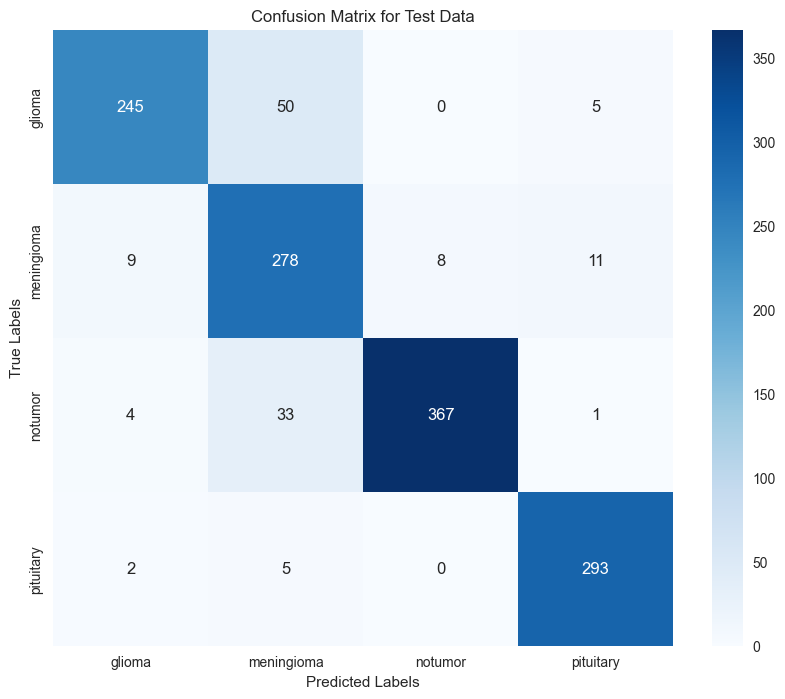

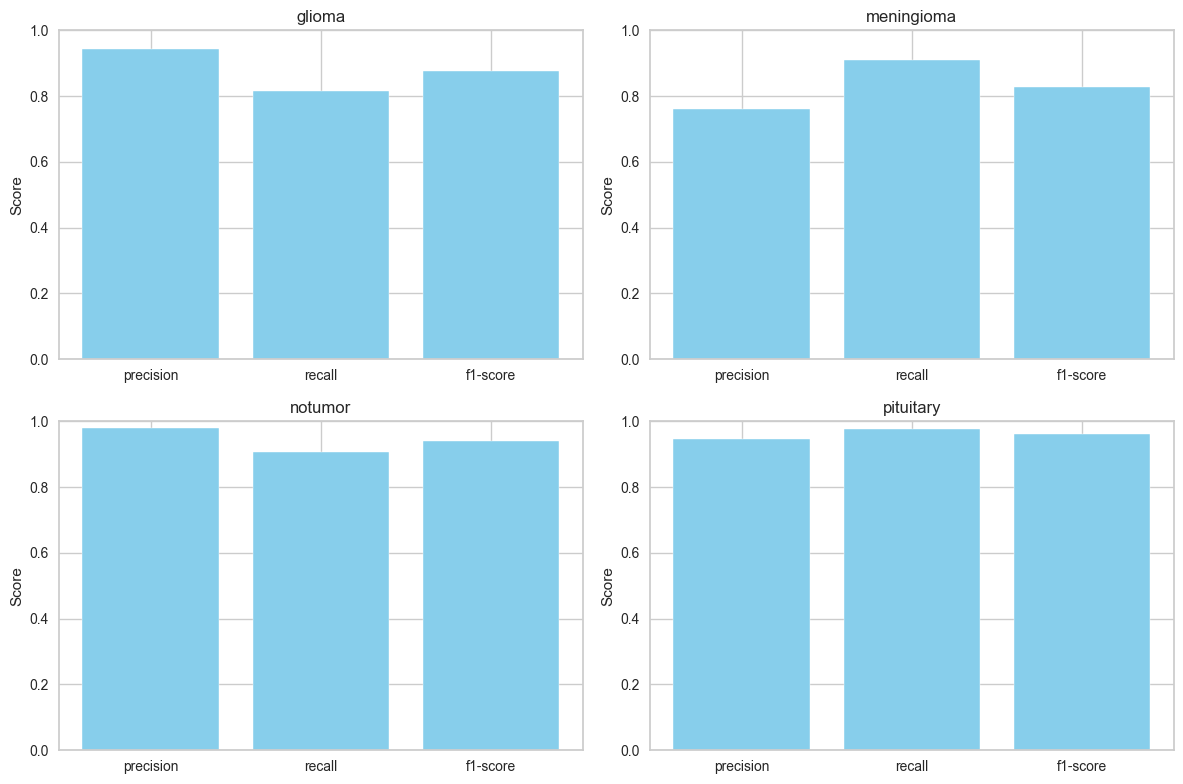

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Generate predictions
y_pred_test = model.predict(test_images_expanded)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Generate a confusion matrix
conf_matrix_test = confusion_matrix(test_labels, y_pred_test_classes)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=test_contents, yticklabels=test_contents)
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate a classification report
class_report_test = classification_report(test_labels, y_pred_test_classes, target_names=test_contents, output_dict=True)

# Visualize the classification report as a bar chart
plt.figure(figsize=(12, 8))
for i, (label, scores) in enumerate(class_report_test.items()):
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue  # skip the averages
    plt.subplot(2, 2, i+1)
    measures = ['precision', 'recall', 'f1-score']
    scores_list = [scores[measure] for measure in measures]
    plt.bar(measures, scores_list, color='skyblue')
    plt.title(label)
    plt.ylim(0, 1)
    plt.ylabel('Score')
plt.tight_layout()
plt.show()
